# Step 1: Imports and image path


In [5]:
# Step 1: Imports and image path
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Use the uploaded file path
img_path = "./moon.jpg"


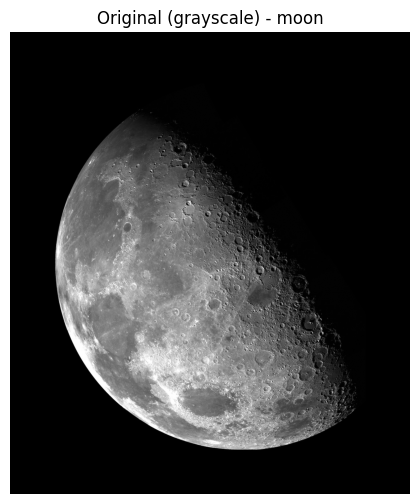

In [6]:
# Step 2: Load image and convert to grayscale
img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
if img is None:
    raise FileNotFoundError(f"Cannot find file at {img_path}")

# If color, convert to grayscale
if img.ndim == 3:
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
else:
    img_gray = img.copy()

img_gray = img_gray.astype(np.float64)  # use float for convolution results

plt.figure(figsize=(6,6))
plt.imshow(img_gray, cmap='gray')
plt.title("Original (grayscale) - moon")
plt.axis('off')
plt.show()


In [7]:
# Step 3: Define Laplacian kernel
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
], dtype=np.float64)


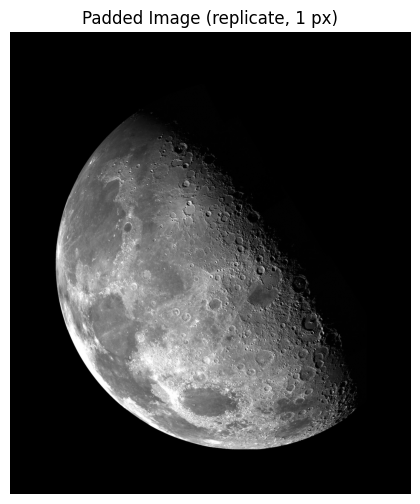

In [8]:
# Step 4: Replicate padding (1-pixel) - function
def replicate_pad(image, pad=1):
    H, W = image.shape
    out = np.zeros((H + 2*pad, W + 2*pad), dtype=image.dtype)
    out[pad:pad+H, pad:pad+W] = image
    # top and bottom
    out[:pad, pad:pad+W] = image[0:1, :]
    out[pad+H:, pad:pad+W] = image[-1:, :]
    # left and right
    out[:, :pad] = out[:, pad:pad+1]
    out[:, pad+W:] = out[:, pad+W-1:pad+W]
    return out

padded = replicate_pad(img_gray, pad=1)

plt.figure(figsize=(6,6))
plt.imshow(padded, cmap='gray')
plt.title("Padded Image (replicate, 1 px)")
plt.axis('off')
plt.show()


In [9]:
# Step 5: Manual convolution function for arbitrary kernel (no libraries)
def convolve2d(image_padded, kernel):
    """
    image_padded: padded image (H+2, W+2) for 3x3 kernel
    kernel: 3x3 numpy array
    returns: convolved image of shape (H, W)
    """
    H_pad, W_pad = image_padded.shape
    H = H_pad - 2
    W = W_pad - 2
    out = np.zeros((H, W), dtype=np.float64)
    
    kH, kW = kernel.shape
    assert kH == 3 and kW == 3, "This function assumes 3x3 kernel"
    
    for i in range(1, H+1):
        for j in range(1, W+1):
            window = image_padded[i-1:i+2, j-1:j+2]
            out[i-1, j-1] = np.sum(window * kernel)
    return out

laplacian_map = convolve2d(padded, kernel)


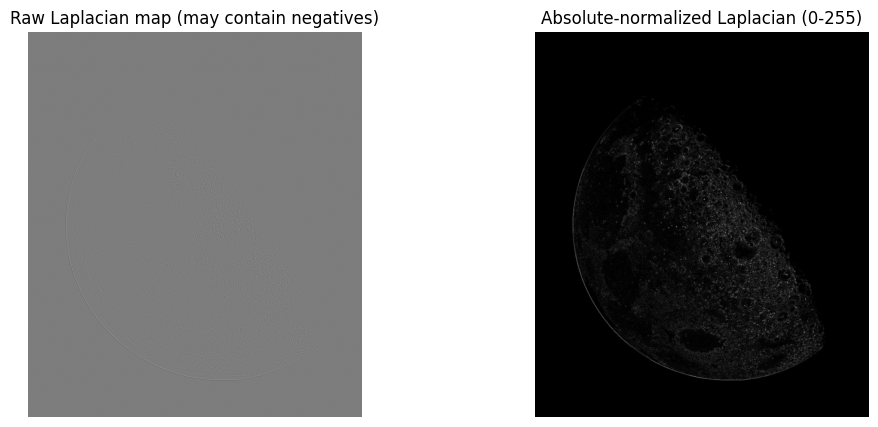

In [10]:
# Step 6: Show raw laplacian map (values can be negative)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(laplacian_map, cmap='gray')
plt.title("Raw Laplacian map (may contain negatives)")
plt.axis('off')

plt.subplot(1,2,2)
# For visibility, show absolute value or normalized version
abs_norm = np.clip(np.abs(laplacian_map), 0, None)
abs_norm = (abs_norm / abs_norm.max()) * 255
plt.imshow(abs_norm.astype(np.uint8), cmap='gray')
plt.title("Absolute-normalized Laplacian (0-255)")
plt.axis('off')
plt.show()


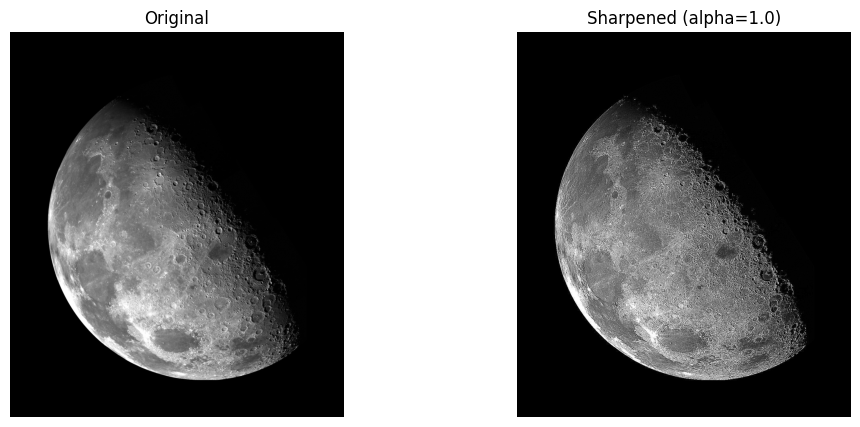

In [11]:
# Step 7: Sharpened image (add laplacian back to original)
# Optionally scale laplacian by alpha to control sharpening strength
alpha = 1.0
sharpened = img_gray + alpha * laplacian_map
# Clip to valid range
sharpened_clipped = np.clip(sharpened, 0, 255)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.imshow(img_gray, cmap='gray')
plt.title("Original")
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(sharpened_clipped.astype(np.uint8), cmap='gray')
plt.title(f"Sharpened (alpha={alpha})")
plt.axis('off')
plt.show()


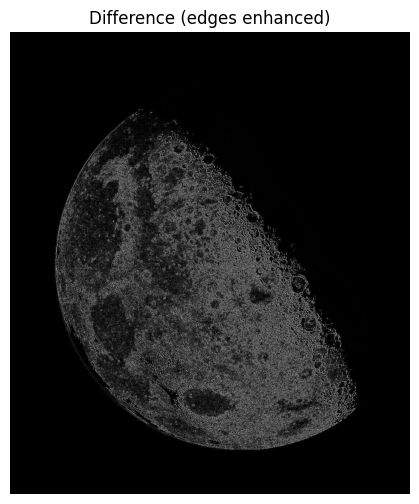

In [12]:
# Step 8: (Optional) show difference to highlight enhanced edges
diff = np.abs(sharpened_clipped - img_gray)
diff_norm = (diff / diff.max()) * 255
plt.figure(figsize=(6,6))
plt.imshow(diff_norm.astype(np.uint8), cmap='gray')
plt.title("Difference (edges enhanced)")
plt.axis('off')
plt.show()
